In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
%matplotlib inline

In [ ]:
path = ('/content/kc_house_data.csv')
data = pd.read_csv(path)
print("Shape : ", data.shape)
print("Is there any null values ? " ,data.isnull().values.any())
data.head()

Shape :  (21613, 21)
Is there any null values ?  False


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Text(0.5, 1.0, 'Price vs Bedrooms')

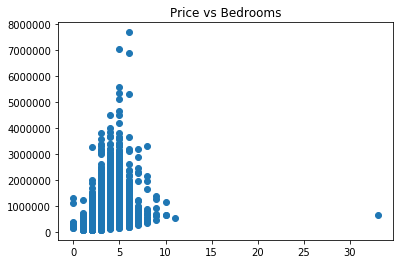

In [ ]:
plt.scatter(data.bedrooms,data.price)
plt.title("Price vs Bedrooms")

In [ ]:
x = data[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','sqft_living15','sqft_lot15']].values
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-0.39873715, -1.44746357, -0.97983502, -0.22832133, -0.915427  ,
        -0.08717263, -0.30575946, -0.62918687, -0.55883575, -0.73470764,
        -0.65868104, -0.54489777, -0.9433552 , -0.26071541],
       [-0.39873715,  0.1756067 ,  0.53363434, -0.18988538,  0.93650577,
        -0.08717263, -0.30575946, -0.62918687, -0.55883575,  0.46084084,
         0.2451414 , -0.6810785 , -0.43268619, -0.18786773],
       [-1.47395936, -1.44746357, -1.42625404, -0.12329847, -0.915427  ,
        -0.08717263, -0.30575946, -0.62918687, -1.40958711, -1.22983377,
        -0.65868104, -1.29389179,  1.07013975, -0.17237524],
       [ 0.67648506,  1.14944885, -0.13055006, -0.2440144 , -0.915427  ,
        -0.08717263, -0.30575946,  2.44429394, -0.55883575, -0.89169885,
         1.39751501, -0.20444594, -0.91417411, -0.28452184],
       [-0.39873715, -0.14900736, -0.43542158, -0.16965339, -0.915427  ,
        -0.08717263, -0.30575946, -0.62918687,  0.29191561, -0.13089528,
        -0.65868104,  0.54

In [ ]:
y = data['price'].values
y[0:5]

array([221900., 538000., 180000., 604000., 510000.])

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split( x, y, test_size=0.3, random_state=1)
print ('Train set:', xtrain.shape,  ytrain.shape)
print ('Test set:', xtest.shape,  ytest.shape)

Train set: (15129, 14) (15129,)
Test set: (6484, 14) (6484,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lr = LinearRegression().fit(xtrain,ytrain)
ypred = lr.predict(xtest)
print("Accuracy : " ,lr.score(xtest,ytest))


Accuracy :  0.6542001594745608


In [ ]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(ypred - ytest)))
print("R2-score: %.2f" % r2_score(ypred , ytest) )

Mean absolute error: 140880.92
R2-score: 0.39
